### **THE BATTLE OF THE NEIGHBORHOODS**
## Comparing Toronto Neighborhoods with Data Science

This project is a part of IBM Data Science Professional Certicate which aims to teach students on how to define a business problem, acquire the data, and analyze that data using various visualization, statistical tools, and machine learning tools to solve problem.

In this project, I leverage the Foursquare location data to explore or compare neighborhoods or cities of my choice or to come up with a problem that I can use the Foursquare location data to solve. 

# **1. Identify the Business Problem**
**Background:**

Toronto is the capital city of the Canadian province of Ontario. With a recorded population of 2,731,571 in 2016, it is the most populous city in Canada and the fourth most populous city in North America. 

Toronto is all about the latest and greatest in culture, design, dining, and entertainment. But everyone needs a break from big city bustle, and that’s where green spaces come in. A diverse eastern city known for its distinctive neighborhoods, Toronto has more than 1,500 parks to explore.

**Problem:**

If I am to move to Toronto, which neighborhood with the best park and avenues would be the most suitable for me? 

I am, and many other, are nature lovers and pet owners, would love to find a neighborhood with great amenities and other types of venues that suit my active, on-the-go lifestyle with my 2 dogs. I'd love to find a location where the richness of nature are preserved while also includes venues such as: 

*   Parks, as #1 priority
*   Coffe shop or cafe
*   Restaurants of various cuisines
*   Nearby vet and pet services
*   Gym

**Problem statement:**

What is/are the best neighborhood to live in Toronto for me as a nature lover/ pet-parent with an active lifestyle?

**Target audience:**

This information provided by this report would be useful for people, especially nature-lovers, pet-owners, with active, on-the-go lifestyle who are interested in comparing different neighborhood of the city of Toronto and are interested in finding the best neighborhood to live in.

# **2. Data Overview**

**Source 1:** Wikipedia for the Toronto neighborhood data

This will give me:

*   Postal code
*   Borough
*   Neighborhood


**Source 2:** Geographical location data using Geocoder package

This will give me:
*   Postal code
*   Latitude
*   Longitude

**Source 3:** Venue data using Foursquare API to get a list of all the venues in Toronto and the rating of each park in each neighborhood

This will give me:

*   Venue id
*   Venue distance
*   Venue name
*   Venue category
*   Venue latitude
*   Venue longitude

And to compare the different parks, I will be using:

*   Likes
*   Rating
*   Tips

# **3. Methodology**


• Data will be collected from https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M, scraped with Beautiful Soup, and cleaned and processed into a Pandas dataframe.

• Using the latitude and longitude collected from the Geocoder package, we merged the two tables together based on Postalcode to get the local venue within a 500-meter radius.

• Using python Folium library, we get to visualize geographic details of Toronto and its neighborhoods.

• Using FourSquare API, we locate and get a list of all the venues in Toronto which included gyms, parks, schools, café shops, restaurants etc. We will explore the neighborhoods and segment them. We set the LIMIT parameter to 100, which would limit the number of venues returned by the Foursquare API and the radius of 500 meter. 

• Using One hot encoding, we analyze the data by transforming Categorical Data into Numerical Data for Machine Learning algorithms. For each of the neighborhoods, individual venues were turned into the frequency at how many of those venues were located in each neighborhood.

• Using k-means, we cluster the neighbourhoods based on 'park'.

• Using matplotlib, we perform data visualization and some statistical analysis.

# **Let's get started**

Before we get the data and start exploring it, let's download all the dependencies that we will need.

In [ ]:
#library to handle data in a vectorized manner
import numpy as np

#library for data analysis
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#library to handle json files
import json

#convert an address into longitude and latitude values
!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim

#library to handle requests
import requests

#transform json file into pandas dataframe
from pandas.io.json import json_normalize

#matplotlib and associated plotting modules
import matplotlib.pyplot as plt
%matplotlib inline 
import matplotlib.cm as cm
import matplotlib.colors as colors

#import kmeans from clustering stage
from sklearn.cluster import KMeans

#import map rendering library
!conda install -c conda-forge folium=0.5.0 --yes
import folium

#import BeautifulSoup
from bs4 import BeautifulSoup

from IPython.display import Image 
from IPython.core.display import HTML 

import xml

print('libraries imported')

/bin/bash: conda: command not found
/bin/bash: conda: command not found
libraries imported


Define Foursquare Credentials and Version

In [ ]:
#Define Foursquare Credentials and Version
CLIENT_ID = 'XDWCXJ5FMB0PUYYS2CZPN2UWQM0XPK0ULMB0IQ2RTCUDJQUX' #Foursquare ID
CLIENT_SECRET = 'AV5TXKYOIZZWPSWMUVEX0O3Y5H2WAZVIR3OX4QHNQSENWEBI' #Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: XDWCXJ5FMB0PUYYS2CZPN2UWQM0XPK0ULMB0IQ2RTCUDJQUX
CLIENT_SECRET:AV5TXKYOIZZWPSWMUVEX0O3Y5H2WAZVIR3OX4QHNQSENWEBI


## **Data Scraping and Cleaning**

In [ ]:
#scrape Wikipedia
url = requests.get('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M').text

#Beautiful Soup is a Python package for parsing HTML and XML documents. 
#It creates a parse tree for parsed pages that can be used to extract data from HTML, which is useful for web scraping.
soup = BeautifulSoup(url,'lxml')
soup

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>List of postal codes of Canada: M - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"9a88577b-6f3e-47be-b2ab-2c3f57c1f8c4","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_postal_codes_of_Canada:_M","wgTitle":"List of postal codes of Canada: M","wgCurRevisionId":979555370,"wgRevisionId":979555370,"wgArticleId":539066,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles with short description","Short description is different from Wikidata","Communications in Ontario","P

In [ ]:
#locate table and use tags to find postal code by 'borough' and 'neighbourhood'
table_post = soup.find('table')
fields = table_post.find_all('td')

postalcode = []
borough = []
neighborhood = []

for i in range(0, len(fields), 3):
  postalcode.append(fields[i].text.strip())
  borough.append(fields[i+1].text.strip())
  neighborhood.append(fields[i+2].text.strip())

df_postalcode = pd.DataFrame(data = [postalcode, borough, neighborhood]).transpose()
df_postalcode.columns = ['Postalcode', 'Borough', 'Neighborhood']
df_postalcode.head(10)

Postalcode           Borough                                 Neighborhood
0        M1A      Not assigned                                 Not assigned
1        M2A      Not assigned                                 Not assigned
2        M3A        North York                                    Parkwoods
3        M4A        North York                             Victoria Village
4        M5A  Downtown Toronto                    Regent Park, Harbourfront
5        M6A        North York             Lawrence Manor, Lawrence Heights
6        M7A  Downtown Toronto  Queen's Park, Ontario Provincial Government
7        M8A      Not assigned                                 Not assigned
8        M9A         Etobicoke      Islington Avenue, Humber Valley Village
9        M1B       Scarborough                               Malvern, Rouge

In [ ]:
#remove 'Not assigned'
df_postalcode['Borough'].replace('Not assigned', np.nan, inplace = True)
df_postalcode.dropna(subset = ['Borough'], inplace = True)
df_postalcode.head(10)

Postalcode           Borough                                 Neighborhood
2         M3A        North York                                    Parkwoods
3         M4A        North York                             Victoria Village
4         M5A  Downtown Toronto                    Regent Park, Harbourfront
5         M6A        North York             Lawrence Manor, Lawrence Heights
6         M7A  Downtown Toronto  Queen's Park, Ontario Provincial Government
8         M9A         Etobicoke      Islington Avenue, Humber Valley Village
9         M1B       Scarborough                               Malvern, Rouge
11        M3B        North York                                    Don Mills
12        M4B         East York              Parkview Hill, Woodbine Gardens
13        M5B  Downtown Toronto                     Garden District, Ryerson

In [ ]:
#More than one neighbourhood can exist in one postal code area. 
#For example, in the table on the Wikipedia page, you will notice that M5A is listed twice and has two neighbourhoods: Harbourfront and Regent Park. 
#These two rows will be combined into one row with the neighbourhoods separated with a 
#The rows were grouped based on the postalcode and borough
df_postalcode = df_postalcode.groupby(['Postalcode', 'Borough'])['Neighborhood'].apply(','.join).reset_index()
df_postalcode.columns = ['Postalcode', 'Borough', 'Neighborhood']
df_postalcode.head(10)

Postalcode      Borough                                     Neighborhood
0        M1B  Scarborough                                   Malvern, Rouge
1        M1C  Scarborough           Rouge Hill, Port Union, Highland Creek
2        M1E  Scarborough                Guildwood, Morningside, West Hill
3        M1G  Scarborough                                           Woburn
4        M1H  Scarborough                                        Cedarbrae
5        M1J  Scarborough                              Scarborough Village
6        M1K  Scarborough      Kennedy Park, Ionview, East Birchmount Park
7        M1L  Scarborough                  Golden Mile, Clairlea, Oakridge
8        M1M  Scarborough  Cliffside, Cliffcrest, Scarborough Village West
9        M1N  Scarborough                      Birch Cliff, Cliffside West

In [ ]:
#check for the size of our dataframe
df_postalcode.shape

(103, 3)

Now that we have built a dataframe of the postal code of each neighborhood along with the borough name and neighborhood name, in order to utilize the Foursquare location data, we need to get the latitude and the longitude coordinates of each neighborhood.

In [ ]:
#add latitude and longitude for our Postal codes using this csv file: http://cocl.us/Geospatial_data
!wget -O geospatial_data.csv 'http://cocl.us/Geospatial_data'

--2020-10-30 20:50:59--  http://cocl.us/Geospatial_data
Resolving cocl.us (cocl.us)... 169.63.96.176, 169.63.96.194
Connecting to cocl.us (cocl.us)|169.63.96.176|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://cocl.us/Geospatial_data [following]
--2020-10-30 20:50:59--  https://cocl.us/Geospatial_data
Connecting to cocl.us (cocl.us)|169.63.96.176|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://ibm.box.com/shared/static/9afzr83pps4pwf2smjjcf1y5mvgb18rr.csv [following]
--2020-10-30 20:51:00--  https://ibm.box.com/shared/static/9afzr83pps4pwf2smjjcf1y5mvgb18rr.csv
Resolving ibm.box.com (ibm.box.com)... 107.152.26.197
Connecting to ibm.box.com (ibm.box.com)|107.152.26.197|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /public/static/9afzr83pps4pwf2smjjcf1y5mvgb18rr.csv [following]
--2020-10-30 20:51:00--  https://ibm.box.com/public/static/9afzr83p

In [ ]:
#load csv into a pandas dataframe
geospatial_data = pd.read_csv('geospatial_data.csv')
geospatial_data.columns = ['Postalcode', 'Latitude', 'Longitude']
geospatial_data.head()

Postalcode   Latitude  Longitude
0        M1B  43.806686 -79.194353
1        M1C  43.784535 -79.160497
2        M1E  43.763573 -79.188711
3        M1G  43.770992 -79.216917
4        M1H  43.773136 -79.239476

In [ ]:
#using the rows were grouped based on the borough, we merge 2 dataframes together based on Postalcode
df_merged_postalcode = df_postalcode.merge(geospatial_data, on = 'Postalcode')
df_merged_postalcode.head()

Postalcode      Borough                            Neighborhood   Latitude  \
0        M1B  Scarborough                          Malvern, Rouge  43.806686   
1        M1C  Scarborough  Rouge Hill, Port Union, Highland Creek  43.784535   
2        M1E  Scarborough       Guildwood, Morningside, West Hill  43.763573   
3        M1G  Scarborough                                  Woburn  43.770992   
4        M1H  Scarborough                               Cedarbrae  43.773136   

   Longitude  
0 -79.194353  
1 -79.160497  
2 -79.188711  
3 -79.216917  
4 -79.239476

In [ ]:
print('The dataframe has {} boroughs and {} neighborhoods'.format(len(df_merged_postalcode['Borough'].unique()), df_merged_postalcode.shape[0]))

The dataframe has 10 boroughs and 103 neighborhoods


In [ ]:
#working with only boroughs that contain the word Toronto, we slice the original dataframe and create a new dataframe of Toronto
df_toronto = df_merged_postalcode[df_merged_postalcode['Borough'].str.contains('Toronto')].reset_index(drop = True)

#check for size
print(df_toronto.shape)

df_toronto.head(10)

(39, 5)


Postalcode          Borough  \
0        M4E     East Toronto   
1        M4K     East Toronto   
2        M4L     East Toronto   
3        M4M     East Toronto   
4        M4N  Central Toronto   
5        M4P  Central Toronto   
6        M4R  Central Toronto   
7        M4S  Central Toronto   
8        M4T  Central Toronto   
9        M4V  Central Toronto   

                                        Neighborhood   Latitude  Longitude  
0                                        The Beaches  43.676357 -79.293031  
1                       The Danforth West, Riverdale  43.679557 -79.352188  
2                     India Bazaar, The Beaches West  43.668999 -79.315572  
3                                    Studio District  43.659526 -79.340923  
4                                      Lawrence Park  43.728020 -79.388790  
5                                   Davisville North  43.712751 -79.390197  
6                 North Toronto West,  Lawrence Park  43.715383 -79.405678  
7                                         Davisville  43.704324 -79.388790  
8                        Moore Park, Summerhill East  43.689574 -79.383160  
9  Summerhill West, Rathnelly, South Hill, Forest...  43.686412 -79.400049

In [ ]:
#drop Postalcode column
df_toronto = df_toronto.iloc[:, 1:]
df_toronto.head(10)

Neighborhood   Latitude  Longitude
0                                        The Beaches  43.676357 -79.293031
1                       The Danforth West, Riverdale  43.679557 -79.352188
2                     India Bazaar, The Beaches West  43.668999 -79.315572
3                                    Studio District  43.659526 -79.340923
4                                      Lawrence Park  43.728020 -79.388790
5                                   Davisville North  43.712751 -79.390197
6                 North Toronto West,  Lawrence Park  43.715383 -79.405678
7                                         Davisville  43.704324 -79.388790
8                        Moore Park, Summerhill East  43.689574 -79.383160
9  Summerhill West, Rathnelly, South Hill, Forest...  43.686412 -79.400049

In [ ]:
#save .csv
df_toronto.to_csv('df_toronto.csv')

In [ ]:
#get the geographical coordinates of Toronto
address = 'Toronto'

#to define an instance of the geocoder, we need to define a user_agent
geolocator = Nominatim(user_agent = 't_explorer')
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geographical coordinate of Toronto are {}, {}'.format(latitude, longitude))

The geographical coordinate of Toronto are 43.6534817, -79.3839347


In [ ]:
#use the python folium library to visualize geographic details of Toronto and its boroughs 
#create a map of Toronto with boroughs superimposed on top using the latitude and longitude values
map_toronto = folium.Map(location = [latitude, longitude], zoom_start = 11)

#add markers
for lat, lng, label in zip(df_toronto['Latitude'], df_toronto['Longitude'], df_toronto['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

## **Getting Venues Data using Foursquare**

In [ ]:
#get top 50 venues within a radius of 500 metres for a given latitude and longitude. 
#below function will return us the venue id , venue name and category
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    #set variables
    radius=500
    LIMIT=50

    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        #create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        #make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        #return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [ ]:
#get venues for all neighborhoods in our dataset
toronto_venues = getNearbyVenues(names=df_toronto['Neighborhood'],
                                latitudes=df_toronto['Latitude'],
                                longitudes=df_toronto['Longitude'])

The Beaches
The Danforth West, Riverdale
India Bazaar, The Beaches West
Studio District
Lawrence Park
Davisville North
North Toronto West,  Lawrence Park
Davisville
Moore Park, Summerhill East
Summerhill West, Rathnelly, South Hill, Forest Hill SE, Deer Park
Rosedale
St. James Town, Cabbagetown
Church and Wellesley
Regent Park, Harbourfront
Garden District, Ryerson
St. James Town
Berczy Park
Central Bay Street
Richmond, Adelaide, King
Harbourfront East, Union Station, Toronto Islands
Toronto Dominion Centre, Design Exchange
Commerce Court, Victoria Hotel
Roselawn
Forest Hill North & West, Forest Hill Road Park
The Annex, North Midtown, Yorkville
University of Toronto, Harbord
Kensington Market, Chinatown, Grange Park
CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport
Stn A PO Boxes
First Canadian Place, Underground city
Christie
Dufferin, Dovercourt Village
Little Portugal, Trinity
Brockton, Parkdale Village, Exhibition Place
High

In [ ]:
#check size of resulting dataframe
toronto_venues.shape

(1171, 7)

In [ ]:
toronto_venues.head(10)

Neighborhood  Neighborhood Latitude  \
0                   The Beaches              43.676357   
1                   The Beaches              43.676357   
2                   The Beaches              43.676357   
3                   The Beaches              43.676357   
4  The Danforth West, Riverdale              43.679557   
5  The Danforth West, Riverdale              43.679557   
6  The Danforth West, Riverdale              43.679557   
7  The Danforth West, Riverdale              43.679557   
8  The Danforth West, Riverdale              43.679557   
9  The Danforth West, Riverdale              43.679557   

   Neighborhood Longitude                               Venue  Venue Latitude  \
0              -79.293031                   Glen Manor Ravine       43.676821   
1              -79.293031  The Big Carrot Natural Food Market       43.678879   
2              -79.293031                 Grover Pub and Grub       43.679181   
3              -79.293031                       Upper Beaches       43.680563   
4              -79.352188                            Pantheon       43.677621   
5              -79.352188                       MenEssentials       43.677820   
6              -79.352188                        Dolce Gelato       43.677773   
7              -79.352188                               Mezes       43.677962   
8              -79.352188                     Cafe Fiorentina       43.677743   
9              -79.352188                          La Diperie       43.677702   

   Venue Longitude      Venue Category  
0       -79.293942               Trail  
1       -79.297734   Health Food Store  
2       -79.297215                 Pub  
3       -79.292869        Neighborhood  
4       -79.351434    Greek Restaurant  
5       -79.351265      Cosmetics Shop  
6       -79.351187      Ice Cream Shop  
7       -79.350196    Greek Restaurant  
8       -79.350115  Italian Restaurant  
9       -79.352265      Ice Cream Shop

In [ ]:
#number of venues per neighborhood
toronto_venues.groupby('Neighborhood').count()

Neighborhood Latitude  \
Neighborhood                                                                
Berczy Park                                                            50   
Brockton, Parkdale Village, Exhibition Place                           23   
Business reply mail Processing Centre, South Ce...                     16   
CN Tower, King and Spadina, Railway Lands, Harb...                     16   
Central Bay Street                                                     50   
Christie                                                               16   
Church and Wellesley                                                   50   
Commerce Court, Victoria Hotel                                         50   
Davisville                                                             33   
Davisville North                                                        9   
Dufferin, Dovercourt Village                                           13   
First Canadian Place, Underground city                                 50   
Forest Hill North & West, Forest Hill Road Park                         4   
Garden District, Ryerson                                               50   
Harbourfront East, Union Station, Toronto Islands                      50   
High Park, The Junction South                                          25   
India Bazaar, The Beaches West                                         19   
Kensington Market, Chinatown, Grange Park                              50   
Lawrence Park                                                           3   
Little Portugal, Trinity                                               45   
Moore Park, Summerhill East                                             2   
North Toronto West,  Lawrence Park                                     18   
Parkdale, Roncesvalles                                                 14   
Queen's Park, Ontario Provincial Government                            33   
Regent Park, Harbourfront                                              44   
Richmond, Adelaide, King                                               50   
Rosedale                                                                4   
Roselawn                                                                2   
Runnymede, Swansea                                                     33   
St. James Town                                                         50   
St. James Town, Cabbagetown                                            48   
Stn A PO Boxes                                                         50   
Studio District                                                        37   
Summerhill West, Rathnelly, South Hill, Forest ...                     14   
The Annex, North Midtown, Yorkville                                    19   
The Beaches                                                             4   
The Danforth West, Riverdale                                           43   
Toronto Dominion Centre, Design Exchange                               50   
University of Toronto, Harbord                                         34   

                                                    Neighborhood Longitude  \
Neighborhood                                                                 
Berczy Park                                                             50   
Brockton, Parkdale Village, Exhibition Place                            23   
Business reply mail Processing Centre, South Ce...                      16   
CN Tower, King and Spadina, Railway Lands, Harb...                      16   
Central Bay Street                                                      50   
Christie                                                                16   
Church and Wellesley                                                    50   
Commerce Court, Victoria Hotel                                          50   
Davisville                                                              33   
Davisville North                    

In [ ]:
#number of unique venue categories
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 214 uniques categories.


In [ ]:
#print out the list of categories
toronto_venues['Venue Category'].unique()[:100]

array(['Trail', 'Health Food Store', 'Pub', 'Neighborhood',
       'Greek Restaurant', 'Cosmetics Shop', 'Ice Cream Shop',
       'Italian Restaurant', 'Brewery', 'Fruit & Vegetable Store',
       'Yoga Studio', 'Dessert Shop', 'Restaurant', 'Bookstore',
       'Juice Bar', 'Pizza Place', 'Furniture / Home Store',
       'Bubble Tea Shop', 'Spa', 'Indian Restaurant', 'Coffee Shop',
       'Caribbean Restaurant', 'Bakery', 'Grocery Store', 'Café',
       'Lounge', 'Frozen Yogurt Shop', 'American Restaurant',
       'Liquor Store', 'Sushi Restaurant', 'Gym', 'Fish & Chips Shop',
       'Fast Food Restaurant', 'Park', 'Pet Store', 'Steakhouse',
       'Burrito Place', 'Movie Theater', 'Sandwich Place', 'Fish Market',
       'Cheese Shop', 'Gay Bar', 'Seafood Restaurant',
       'Middle Eastern Restaurant', 'Thai Restaurant', 'Stationery Store',
       'Comfort Food Restaurant', 'Coworking Space', 'Wine Bar',
       'Latin American Restaurant', 'Gastropub', 'Gym / Fitness Center',
       '

In [ ]:
#check for availability of 'park'
'Park' in toronto_venues['Venue Category'].unique()

True

## **Analyze each neighborhood**

In [ ]:
#one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhoods'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

print(toronto_onehot.shape)
toronto_onehot.head(10)

(1171, 215)


Neighborhoods  Airport  Airport Food Court  Airport Gate  \
0                   The Beaches        0                   0             0   
1                   The Beaches        0                   0             0   
2                   The Beaches        0                   0             0   
3                   The Beaches        0                   0             0   
4  The Danforth West, Riverdale        0                   0             0   
5  The Danforth West, Riverdale        0                   0             0   
6  The Danforth West, Riverdale        0                   0             0   
7  The Danforth West, Riverdale        0                   0             0   
8  The Danforth West, Riverdale        0                   0             0   
9  The Danforth West, Riverdale        0                   0             0   

   Airport Lounge  Airport Service  Airport Terminal  American Restaurant  \
0               0                0                 0                    0   
1               0                0                 0                    0   
2               0                0                 0                    0   
3               0                0                 0                    0   
4               0                0                 0                    0   
5               0                0                 0                    0   
6               0                0                 0                    0   
7               0                0                 0                    0   
8               0                0                 0                    0   
9               0                0                 0                    0   

   Antique Shop  Aquarium  Art Gallery  Art Museum  Arts & Crafts Store  \
0             0         0            0           0                    0   
1             0         0            0           0                    0   
2             0         0            0           0                    0   
3             0         0            0           0                    0   
4             0         0            0           0                    0   
5             0         0            0           0                    0   
6             0         0            0           0                    0   
7             0         0            0           0                    0   
8             0         0            0           0                    0   
9             0         0            0           0                    0   

   Asian Restaurant  Athletics & Sports  Auto Workshop  BBQ Joint  Baby Store  \
0                 0                   0              0          0           0   
1                 0                   0              0          0           0   
2                 0                   0              0          0           0   
3                 0                   0              0          0           0   
4                 0                   0              0          0           0   
5                 0                   0              0          0           0   
6                 0                   0              0          0           0   
7                 0                   0              0          0           0   
8                 0                   0              0          0           0   
9                 0                   0              0          0           0   

   Bagel Shop  Bakery  Bank  Bar  Baseball Stadium  Basketball Stadium  Beach  \
0           0       0     0    0                 0                   0      0   
1           0       0     0    0                 0                   0      0   
2           0       0     0    0                 0                   0      0   
3           0       0     0    0                 0                   0      0   
4           0       0     0    0                 0                   0      0   
5           0       0     0    0                 0                   0      0   
6           0       0     

In [ ]:
#group rows by neighborhood and by taking the mean of the frequency of occurrence of each category
toronto_grouped = toronto_onehot.groupby(["Neighborhoods"]).mean().reset_index()

print(toronto_grouped.shape)
toronto_grouped

(39, 215)


Neighborhoods  Airport  \
0                                         Berczy Park   0.0000   
1        Brockton, Parkdale Village, Exhibition Place   0.0000   
2   Business reply mail Processing Centre, South C...   0.0000   
3   CN Tower, King and Spadina, Railway Lands, Har...   0.0625   
4                                  Central Bay Street   0.0000   
5                                            Christie   0.0000   
6                                Church and Wellesley   0.0000   
7                      Commerce Court, Victoria Hotel   0.0000   
8                                          Davisville   0.0000   
9                                    Davisville North   0.0000   
10                       Dufferin, Dovercourt Village   0.0000   
11             First Canadian Place, Underground city   0.0000   
12    Forest Hill North & West, Forest Hill Road Park   0.0000   
13                           Garden District, Ryerson   0.0000   
14  Harbourfront East, Union Station, Toronto Islands   0.0000   
15                      High Park, The Junction South   0.0000   
16                     India Bazaar, The Beaches West   0.0000   
17          Kensington Market, Chinatown, Grange Park   0.0000   
18                                      Lawrence Park   0.0000   
19                           Little Portugal, Trinity   0.0000   
20                        Moore Park, Summerhill East   0.0000   
21                 North Toronto West,  Lawrence Park   0.0000   
22                             Parkdale, Roncesvalles   0.0000   
23        Queen's Park, Ontario Provincial Government   0.0000   
24                          Regent Park, Harbourfront   0.0000   
25                           Richmond, Adelaide, King   0.0000   
26                                           Rosedale   0.0000   
27                                           Roselawn   0.0000   
28                                 Runnymede, Swansea   0.0000   
29                                     St. James Town   0.0000   
30                        St. James Town, Cabbagetown   0.0000   
31                                     Stn A PO Boxes   0.0000   
32                                    Studio District   0.0000   
33  Summerhill West, Rathnelly, South Hill, Forest...   0.0000   
34                The Annex, North Midtown, Yorkville   0.0000   
35                                        The Beaches   0.0000   
36                       The Danforth West, Riverdale   0.0000   
37           Toronto Dominion Centre, Design Exchange   0.0000   
38                     University of Toronto, Harbord   0.0000   

    Airport Food Court  Airport Gate  Airport Lounge  Airport Service  \
0               0.0000        0.0000           0.000            0.000   
1               0.0000        0.0000           0.000            0.000   
2               0.0000        0.0000           0.000            0.000   
3               0.0625        0.0625           0.125            0.125   
4               0.0000        0.0000           0.000            0.000   
5               0.0000        0.0000           0.000            0.000   
6               0.0000        0.0000           0.000            0.000   
7               0.0000        0.0000           0.000            0.000   
8               0.0000        0.0000           0.000            0.000   
9               0.0000        0.0000           0.000            0.000   
10              0.0000        0.0000           0.000            0.000   
11              0.0000        0.0000           0.000            0.000   
12              0.0000        0.0000           0.000            0.000   
13              0.0000        0.0000           0.000            0.000   
14              0.0000        0.0000           0.000            0.000   
15              0.0000        0.0000           0.000            0.000   
16              0.0000        0.0000           0.000            0.000   
17              0.0000        0.0000           0.000            0.000   
18          

In [ ]:
#check for the total number of parks
len(toronto_grouped[toronto_grouped["Park"] > 0])

25

In [ ]:
#create a new dataframe to find 'park' only
toronto_park = toronto_grouped[["Neighborhoods","Park"]]
toronto_park = toronto_park.rename(columns={'Neighborhoods':'Neighborhood'})
toronto_park.head()

Neighborhood    Park
0                                        Berczy Park  0.0200
1       Brockton, Parkdale Village, Exhibition Place  0.0000
2  Business reply mail Processing Centre, South C...  0.0625
3  CN Tower, King and Spadina, Railway Lands, Har...  0.0000
4                                 Central Bay Street  0.0200

## **Clustering neighborhoods**

To determine the optimal number of clusters, we need to plot the performances(inertia) against the range of values of k.

To do this we used k-Means clustering. To get our optimum k value that was neither overfitting or underfitting the model, we used the Elbow Point Technique. In this technique, we ran a test with different number of k values and measured the accuracy and then chose the best k value.

In [ ]:
#We will use k-means clustering
#find the best K using the Elbow Point method

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=15, random_state=8)
X = toronto_park.drop(['Neighborhood'], axis=1)


kmeans.fit(X)
kmeans.labels_[0:10]

array([0, 0, 2, 0, 0, 2, 0, 0, 0, 2], dtype=int32)

Text(0, 0.5, 'Error')

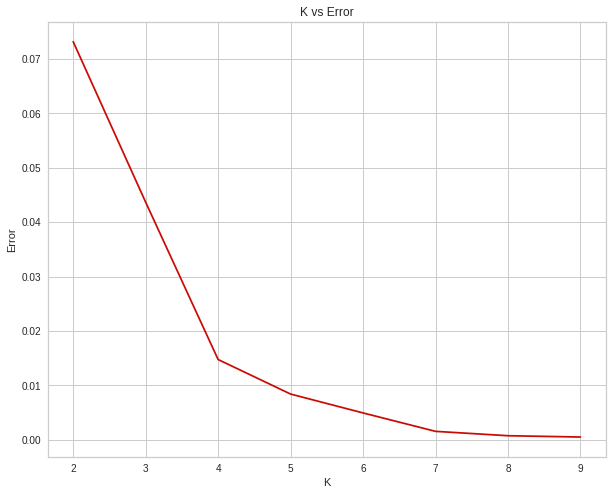

In [ ]:
def get_inertia(n_clusters):
    km = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=15, random_state=8)
    km.fit(X)
    return km.inertia_

scores = [get_inertia(x) for x in range(2, 10)]


plt.figure(figsize=[10, 8])
sns.lineplot(x=range(2, 10), y=scores, color='r')
plt.title("K vs Error")
plt.xticks(range(2, 10))
plt.xlabel("K")
plt.ylabel("Error")

/usr/local/lib/python3.6/dist-packages/yellowbrick/cluster/elbow.py:257: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (19). Possibly due to duplicate points in X.
  self.estimator.fit(X)
/usr/local/lib/python3.6/dist-packages/yellowbrick/cluster/elbow.py:257: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (20). Possibly due to duplicate points in X.
  self.estimator.fit(X)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f359875f780>,
                 k=None, metric=None, model=None, timings=True)

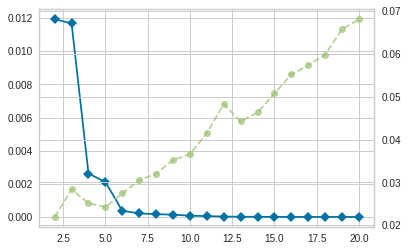

In [ ]:
from yellowbrick.cluster import KElbowVisualizer

#instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,21))

#fit the data to the visualizer
visualizer.fit(X)       
visualizer

To determine the optimal number of clusters, we have to select the value of k at the “elbow” ie the point after which the distortion/inertia start decreasing in a linear fashion. Thus for the given data, we conclude that the optimal number of clusters for the data is 5.

In [ ]:
#run k-means to cluster the neighborhoods in Toronto into 5 clusters
#set number of clusters
torontoclusters = 5

toronto_clustering = toronto_park.drop(["Neighborhood"], 1)

#run k-means clustering
kmeans = KMeans(n_clusters=torontoclusters, random_state=0).fit(toronto_clustering)

#check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 0, 4, 0, 0, 3, 0, 0, 0, 3], dtype=int32)

In [ ]:
#create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.
toronto_merged = toronto_park.copy()

#add clustering labels
toronto_merged["Cluster Labels"] = kmeans.labels_

toronto_merged.rename(columns={"Neighborhoods": "Neighborhood"}, inplace=True)
toronto_merged.head(10)

Neighborhood      Park  Cluster Labels
0                                        Berczy Park  0.020000               0
1       Brockton, Parkdale Village, Exhibition Place  0.000000               0
2  Business reply mail Processing Centre, South C...  0.062500               4
3  CN Tower, King and Spadina, Railway Lands, Har...  0.000000               0
4                                 Central Bay Street  0.020000               0
5                                           Christie  0.125000               3
6                               Church and Wellesley  0.020000               0
7                     Commerce Court, Victoria Hotel  0.020000               0
8                                         Davisville  0.030303               0
9                                   Davisville North  0.111111               3

We then merged the Foursquare Venue data with our clustered park data which then gave us the nearest venue for each of the Neighborhoods based on 'park'.

In [ ]:
#merge toronto_grouped with toronto venues to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(toronto_venues.set_index("Neighborhood"), on="Neighborhood")

print(toronto_merged.shape)
toronto_merged.head(10)

(1171, 9)


Neighborhood  Park  Cluster Labels  Neighborhood Latitude  \
0  Berczy Park  0.02               0              43.644771   
0  Berczy Park  0.02               0              43.644771   
0  Berczy Park  0.02               0              43.644771   
0  Berczy Park  0.02               0              43.644771   
0  Berczy Park  0.02               0              43.644771   
0  Berczy Park  0.02               0              43.644771   
0  Berczy Park  0.02               0              43.644771   
0  Berczy Park  0.02               0              43.644771   
0  Berczy Park  0.02               0              43.644771   
0  Berczy Park  0.02               0              43.644771   

   Neighborhood Longitude                                      Venue  \
0              -79.373306       The Keg Steakhouse + Bar - Esplanade   
0              -79.373306                                       LCBO   
0              -79.373306                             Fresh On Front   
0              -79.373306                     Goose Island Brewhouse   
0              -79.373306                              Meridian Hall   
0              -79.373306                                Berczy Park   
0              -79.373306  Hockey Hall Of Fame (Hockey Hall of Fame)   
0              -79.373306       St. Lawrence Market (South Building)   
0              -79.373306                             D.W. Alexander   
0              -79.373306                               Dog Fountain   

   Venue Latitude  Venue Longitude                 Venue Category  
0       43.646712       -79.374768                     Restaurant  
0       43.642944       -79.372440                   Liquor Store  
0       43.647815       -79.374453  Vegetarian / Vegan Restaurant  
0       43.647329       -79.373541                       Beer Bar  
0       43.646292       -79.376022                   Concert Hall  
0       43.648048       -79.375172                           Park  
0       43.646974       -79.377323                         Museum  
0       43.648743       -79.371597                 Farmers Market  
0       43.648333       -79.373826                   Cocktail Bar  
0       43.647998       -79.375361                       Fountain

In [ ]:
#sort the results by Cluster Labels
print(toronto_merged.shape)
toronto_merged.sort_values(["Cluster Labels"], inplace=True)
toronto_merged

(1171, 9)


Neighborhood      Park  \
0                                         Berczy Park  0.020000   
25                           Richmond, Adelaide, King  0.000000   
25                           Richmond, Adelaide, King  0.000000   
25                           Richmond, Adelaide, King  0.000000   
25                           Richmond, Adelaide, King  0.000000   
25                           Richmond, Adelaide, King  0.000000   
25                           Richmond, Adelaide, King  0.000000   
25                           Richmond, Adelaide, King  0.000000   
25                           Richmond, Adelaide, King  0.000000   
25                           Richmond, Adelaide, King  0.000000   
25                           Richmond, Adelaide, King  0.000000   
25                           Richmond, Adelaide, King  0.000000   
25                           Richmond, Adelaide, King  0.000000   
25                           Richmond, Adelaide, King  0.000000   
25                           Richmond, Adelaide, King  0.000000   
25                           Richmond, Adelaide, King  0.000000   
25                           Richmond, Adelaide, King  0.000000   
25                           Richmond, Adelaide, King  0.000000   
25                           Richmond, Adelaide, King  0.000000   
25                           Richmond, Adelaide, King  0.000000   
25                           Richmond, Adelaide, King  0.000000   
25                           Richmond, Adelaide, King  0.000000   
25                           Richmond, Adelaide, King  0.000000   
25                           Richmond, Adelaide, King  0.000000   
25                           Richmond, Adelaide, King  0.000000   
25                           Richmond, Adelaide, King  0.000000   
25                           Richmond, Adelaide, King  0.000000   
25                           Richmond, Adelaide, King  0.000000   
25                           Richmond, Adelaide, King  0.000000   
25                           Richmond, Adelaide, King  0.000000   
25                           Richmond, Adelaide, King  0.000000   
25                           Richmond, Adelaide, King  0.000000   
23        Queen's Park, Ontario Provincial Government  0.030303   
23        Queen's Park, Ontario Provincial Government  0.030303   
23        Queen's Park, Ontario Provincial Government  0.030303   
23        Queen's Park, Ontario Provincial Government  0.030303   
23        Queen's Park, Ontario Provincial Government  0.030303   
23        Queen's Park, Ontario Provincial Government  0.030303   
23        Queen's Park, Ontario Provincial Government  0.030303   
23        Queen's Park, Ontario Provincial Government  0.030303   
23        Queen's Park, Ontario Provincial Government  0.030303   
23        Queen's Park, Ontario Provincial Government  0.030303   
23        Queen's Park, Ontario Provincial Government  0.030303   
23        Queen's Park, Ontario Provincial Government  0.030303   
23        Queen's Park, Ontario Provincial Government  0.030303   
25                           Richmond, Adelaide, King  0.000000   
23        Queen's Park, Ontario Provincial Government  0.030303   
25                           Richmond, Adelaide, King  0.000000   
25                           Richmond, Adelaide, King  0.000000   
25                           Richmond, Adelaide, King  0.000000   
25                           Richmond, Adelaide, King  0.000000   
25                           Richmond, Adelaide, King  0.000000   
25                           Richmond, Adelaide, King  0.000000   
25                           Richmond, Adelaide, King  0.000000   
25                           Richmond, Adelaide, King  0.000000   
25                           Richmond, Adelaide, King  0.000000   
25                           Richmond, Adelaide, King  0.000000   
25                           Richmond, Adelaide, King  0.000000   
25                           Richmond, Adelaide, King  0.000000   
25                   

In [ ]:
#export to .csv
toronto_merged.to_csv('toronto_merged.csv')

In [ ]:
#visualize clusters
#create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

#set color scheme for the clusters
x = np.arange(torontoclusters)
ys = [i+x+(i*x)**2 for i in range(torontoclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

#add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Neighborhood Latitude'], toronto_merged['Neighborhood Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' - Cluster ' + str(cluster))
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [ ]:
#save the map as HTML file
map_clusters.save('map_clusters.html')

# **4. Result**

Result will be a table with all clustered data based on the frequency of 'park' along with the nearby venues.

Another table of likes, rating, and tips will be constructed to see which park in which neighborhood and borough is the best option.



## **Analyze clusters**

In [ ]:
#cluster 0
toronto_merged.loc[toronto_merged['Cluster Labels'] == 0]

Neighborhood      Park  \
0                                         Berczy Park  0.020000   
25                           Richmond, Adelaide, King  0.000000   
25                           Richmond, Adelaide, King  0.000000   
25                           Richmond, Adelaide, King  0.000000   
25                           Richmond, Adelaide, King  0.000000   
25                           Richmond, Adelaide, King  0.000000   
25                           Richmond, Adelaide, King  0.000000   
25                           Richmond, Adelaide, King  0.000000   
25                           Richmond, Adelaide, King  0.000000   
25                           Richmond, Adelaide, King  0.000000   
25                           Richmond, Adelaide, King  0.000000   
25                           Richmond, Adelaide, King  0.000000   
25                           Richmond, Adelaide, King  0.000000   
25                           Richmond, Adelaide, King  0.000000   
25                           Richmond, Adelaide, King  0.000000   
25                           Richmond, Adelaide, King  0.000000   
25                           Richmond, Adelaide, King  0.000000   
25                           Richmond, Adelaide, King  0.000000   
25                           Richmond, Adelaide, King  0.000000   
25                           Richmond, Adelaide, King  0.000000   
25                           Richmond, Adelaide, King  0.000000   
25                           Richmond, Adelaide, King  0.000000   
25                           Richmond, Adelaide, King  0.000000   
25                           Richmond, Adelaide, King  0.000000   
25                           Richmond, Adelaide, King  0.000000   
25                           Richmond, Adelaide, King  0.000000   
25                           Richmond, Adelaide, King  0.000000   
25                           Richmond, Adelaide, King  0.000000   
25                           Richmond, Adelaide, King  0.000000   
25                           Richmond, Adelaide, King  0.000000   
25                           Richmond, Adelaide, King  0.000000   
25                           Richmond, Adelaide, King  0.000000   
23        Queen's Park, Ontario Provincial Government  0.030303   
23        Queen's Park, Ontario Provincial Government  0.030303   
23        Queen's Park, Ontario Provincial Government  0.030303   
23        Queen's Park, Ontario Provincial Government  0.030303   
23        Queen's Park, Ontario Provincial Government  0.030303   
23        Queen's Park, Ontario Provincial Government  0.030303   
23        Queen's Park, Ontario Provincial Government  0.030303   
23        Queen's Park, Ontario Provincial Government  0.030303   
23        Queen's Park, Ontario Provincial Government  0.030303   
23        Queen's Park, Ontario Provincial Government  0.030303   
23        Queen's Park, Ontario Provincial Government  0.030303   
23        Queen's Park, Ontario Provincial Government  0.030303   
23        Queen's Park, Ontario Provincial Government  0.030303   
25                           Richmond, Adelaide, King  0.000000   
23        Queen's Park, Ontario Provincial Government  0.030303   
25                           Richmond, Adelaide, King  0.000000   
25                           Richmond, Adelaide, King  0.000000   
25                           Richmond, Adelaide, King  0.000000   
25                           Richmond, Adelaide, King  0.000000   
25                           Richmond, Adelaide, King  0.000000   
25                           Richmond, Adelaide, King  0.000000   
25                           Richmond, Adelaide, King  0.000000   
25                           Richmond, Adelaide, King  0.000000   
25                           Richmond, Adelaide, King  0.000000   
25                           Richmond, Adelaide, King  0.000000   
25                           Richmond, Adelaide, King  0.000000   
25                           Richmond, Adelaide, King  0.000000   
25                   

In [ ]:
#cluster 1
toronto_merged.loc[toronto_merged['Cluster Labels'] == 1]

Neighborhood  Park  Cluster Labels  Neighborhood Latitude  \
26     Rosedale   0.5               1              43.679563   
26     Rosedale   0.5               1              43.679563   
26     Rosedale   0.5               1              43.679563   
26     Rosedale   0.5               1              43.679563   

    Neighborhood Longitude                 Venue  Venue Latitude  \
26              -79.377529         Rosedale Park       43.682328   
26              -79.377529        Milkman's Lane       43.676352   
26              -79.377529  Alex Murray Parkette       43.678300   
26              -79.377529          Whitney Park       43.682036   

    Venue Longitude Venue Category  
26       -79.378934     Playground  
26       -79.373842          Trail  
26       -79.382773           Park  
26       -79.373788           Park

In [ ]:
#cluster 2
toronto_merged.loc[toronto_merged['Cluster Labels'] == 2]

Neighborhood      Park  Cluster Labels  \
12  Forest Hill North & West, Forest Hill Road Park  0.250000               2   
18                                    Lawrence Park  0.333333               2   
18                                    Lawrence Park  0.333333               2   
18                                    Lawrence Park  0.333333               2   
12  Forest Hill North & West, Forest Hill Road Park  0.250000               2   
12  Forest Hill North & West, Forest Hill Road Park  0.250000               2   
12  Forest Hill North & West, Forest Hill Road Park  0.250000               2   

    Neighborhood Latitude  Neighborhood Longitude  \
12              43.696948              -79.411307   
18              43.728020              -79.388790   
18              43.728020              -79.388790   
18              43.728020              -79.388790   
12              43.696948              -79.411307   
12              43.696948              -79.411307   
12              43.696948              -79.411307   

                              Venue  Venue Latitude  Venue Longitude  \
12                   Oliver jewelry       43.700374       -79.407644   
18             Lawrence Park Ravine       43.726963       -79.394382   
18               Zodiac Swim School       43.728532       -79.382860   
18   TTC Bus #162 - Lawrence-Donway       43.728026       -79.382805   
12       Kay Gardner Beltline Trail       43.698446       -79.406873   
12            Forest Hill Road Park       43.697945       -79.406605   
12  Nikko Sushi Japenese Restaurant       43.700443       -79.407957   

      Venue Category  
12     Jewelry Store  
18              Park  
18       Swim School  
18          Bus Line  
12             Trail  
12              Park  
12  Sushi Restaurant

In [ ]:
#cluster 3
toronto_merged.loc[toronto_merged['Cluster Labels'] == 3]

Neighborhood      Park  Cluster Labels  \
5                         Christie  0.125000               3   
5                         Christie  0.125000               3   
5                         Christie  0.125000               3   
5                         Christie  0.125000               3   
5                         Christie  0.125000               3   
5                         Christie  0.125000               3   
16  India Bazaar, The Beaches West  0.105263               3   
5                         Christie  0.125000               3   
5                         Christie  0.125000               3   
5                         Christie  0.125000               3   
5                         Christie  0.125000               3   
5                         Christie  0.125000               3   
5                         Christie  0.125000               3   
5                         Christie  0.125000               3   
16  India Bazaar, The Beaches West  0.105263               3   
5                         Christie  0.125000               3   
5                         Christie  0.125000               3   
9                 Davisville North  0.111111               3   
9                 Davisville North  0.111111               3   
9                 Davisville North  0.111111               3   
16  India Bazaar, The Beaches West  0.105263               3   
16  India Bazaar, The Beaches West  0.105263               3   
16  India Bazaar, The Beaches West  0.105263               3   
16  India Bazaar, The Beaches West  0.105263               3   
16  India Bazaar, The Beaches West  0.105263               3   
16  India Bazaar, The Beaches West  0.105263               3   
16  India Bazaar, The Beaches West  0.105263               3   
16  India Bazaar, The Beaches West  0.105263               3   
16  India Bazaar, The Beaches West  0.105263               3   
16  India Bazaar, The Beaches West  0.105263               3   
16  India Bazaar, The Beaches West  0.105263               3   
16  India Bazaar, The Beaches West  0.105263               3   
16  India Bazaar, The Beaches West  0.105263               3   
9                 Davisville North  0.111111               3   
16  India Bazaar, The Beaches West  0.105263               3   
16  India Bazaar, The Beaches West  0.105263               3   
16  India Bazaar, The Beaches West  0.105263               3   
9                 Davisville North  0.111111               3   
9                 Davisville North  0.111111               3   
9                 Davisville North  0.111111               3   
9                 Davisville North  0.111111               3   
9                 Davisville North  0.111111               3   
16  India Bazaar, The Beaches West  0.105263               3   
5                         Christie  0.125000               3   

    Neighborhood Latitude  Neighborhood Longitude  \
5               43.669542              -79.422564   
5               43.669542              -79.422564   
5               43.669542              -79.422564   
5               43.669542              -79.422564   
5               43.669542              -79.422564   
5               43.669542              -79.422564   
16              43.668999              -79.315572   
5               43.669542              -79.422564   
5               43.669542              -79.422564   
5               43.669542              -79.422564   
5               43.669542              -79.422564   
5               43.669542              -79.422564   
5               43.669542              -79.422564   
5               43.669542              -79.422564   
16              43.668999              -79.315572   
5               43.669542              -79.422564   
5               43.669542              -79.422564   
9               43.712751              -79.390197   
9               43.712751              -79.390197   
9               43.712751              -79.390197   
16              43.668999   

In [ ]:
#cluster 4
toronto_merged.loc[toronto_merged['Cluster Labels'] == 4]

Neighborhood      Park  \
2   Business reply mail Processing Centre, South C...  0.062500   
2   Business reply mail Processing Centre, South C...  0.062500   
2   Business reply mail Processing Centre, South C...  0.062500   
14  Harbourfront East, Union Station, Toronto Islands  0.040000   
14  Harbourfront East, Union Station, Toronto Islands  0.040000   
14  Harbourfront East, Union Station, Toronto Islands  0.040000   
14  Harbourfront East, Union Station, Toronto Islands  0.040000   
14  Harbourfront East, Union Station, Toronto Islands  0.040000   
21                 North Toronto West,  Lawrence Park  0.055556   
10                       Dufferin, Dovercourt Village  0.076923   
10                       Dufferin, Dovercourt Village  0.076923   
10                       Dufferin, Dovercourt Village  0.076923   
10                       Dufferin, Dovercourt Village  0.076923   
10                       Dufferin, Dovercourt Village  0.076923   
14  Harbourfront East, Union Station, Toronto Islands  0.040000   
14  Harbourfront East, Union Station, Toronto Islands  0.040000   
14  Harbourfront East, Union Station, Toronto Islands  0.040000   
14  Harbourfront East, Union Station, Toronto Islands  0.040000   
14  Harbourfront East, Union Station, Toronto Islands  0.040000   
14  Harbourfront East, Union Station, Toronto Islands  0.040000   
14  Harbourfront East, Union Station, Toronto Islands  0.040000   
2   Business reply mail Processing Centre, South C...  0.062500   
14  Harbourfront East, Union Station, Toronto Islands  0.040000   
14  Harbourfront East, Union Station, Toronto Islands  0.040000   
14  Harbourfront East, Union Station, Toronto Islands  0.040000   
14  Harbourfront East, Union Station, Toronto Islands  0.040000   
14  Harbourfront East, Union Station, Toronto Islands  0.040000   
14  Harbourfront East, Union Station, Toronto Islands  0.040000   
14  Harbourfront East, Union Station, Toronto Islands  0.040000   
14  Harbourfront East, Union Station, Toronto Islands  0.040000   
14  Harbourfront East, Union Station, Toronto Islands  0.040000   
14  Harbourfront East, Union Station, Toronto Islands  0.040000   
14  Harbourfront East, Union Station, Toronto Islands  0.040000   
2   Business reply mail Processing Centre, South C...  0.062500   
14  Harbourfront East, Union Station, Toronto Islands  0.040000   
2   Business reply mail Processing Centre, South C...  0.062500   
14  Harbourfront East, Union Station, Toronto Islands  0.040000   
14  Harbourfront East, Union Station, Toronto Islands  0.040000   
14  Harbourfront East, Union Station, Toronto Islands  0.040000   
15                      High Park, The Junction South  0.040000   
15                      High Park, The Junction South  0.040000   
15                      High Park, The Junction South  0.040000   
15                      High Park, The Junction South  0.040000   
15                      High Park, The Junction South  0.040000   
15                      High Park, The Junction South  0.040000   
15                      High Park, The Junction South  0.040000   
15                      High Park, The Junction South  0.040000   
15                      High Park, The Junction South  0.040000   
15                      High Park, The Junction South  0.040000   
14  Harbourfront East, Union Station, Toronto Islands  0.040000   
15                      High Park, The Junction South  0.040000   
15                      High Park, The Junction South  0.040000   
15                      High Park, The Junction South  0.040000   
15                      High Park, The Junction South  0.040000   
15                      High Park, The Junction South  0.040000   
15                      High Park, The Junction South  0.040000   
15                      High Park, The Junction South  0.040000   
15                      High Park, The Junction South  0.040000   
15                      High Park, The Junction South  0.040000   
15                   

In [ ]:
#number of parks for each of the neighborhood
column_names=['Borough', 'Neighborhood', 'ID','Name']
park_stat = pd.DataFrame(columns=column_names)
count=1
for row in df_toronto.values.tolist():
    Borough, Neighborhood, Latitude, Longitude=row
    venues = get_venues(Latitude,Longitude)
    parks = venues[venues['Category']=='Park']   
    print('(',count,'/',len(df_toronto),')','Parks in '+Neighborhood+', '+Borough+':'+str(len(parks)))
    for parks_detail in parks.values.tolist():
        id, name , category = parks_detail
        park_stat = park_stat.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name
                                               }, ignore_index=True)
    count+=1

( 1 / 39 ) Parks in The Beaches, East Toronto:2
( 2 / 39 ) Parks in The Danforth West, Riverdale, East Toronto:2
( 3 / 39 ) Parks in India Bazaar, The Beaches West, East Toronto:5
( 4 / 39 ) Parks in Studio District, East Toronto:1
( 5 / 39 ) Parks in Lawrence Park, Central Toronto:2
( 6 / 39 ) Parks in Davisville North, Central Toronto:3
( 7 / 39 ) Parks in North Toronto West,  Lawrence Park, Central Toronto:3
( 8 / 39 ) Parks in Davisville, Central Toronto:3
( 9 / 39 ) Parks in Moore Park, Summerhill East, Central Toronto:7
( 10 / 39 ) Parks in Summerhill West, Rathnelly, South Hill, Forest Hill SE, Deer Park, Central Toronto:3
( 11 / 39 ) Parks in Rosedale, Downtown Toronto:3
( 12 / 39 ) Parks in St. James Town, Cabbagetown, Downtown Toronto:4
( 13 / 39 ) Parks in Church and Wellesley, Downtown Toronto:1
( 14 / 39 ) Parks in Regent Park, Harbourfront, Downtown Toronto:3
( 15 / 39 ) Parks in Garden District, Ryerson, Downtown Toronto:0
( 16 / 39 ) Parks in St. James Town, Downtown To

In [ ]:
#export to .csv
park_stat.to_csv('park_stat.csv')

## **Discussion**

### **Observation**

**Cluster 0:**

Cluster 1 has the lowest number of park (frequency = 0 - 0.030). This will not be in consideration.

**Cluster 1:**

Cluster 1 of Rosedale has the highest number of park (frequency = 0.5) however the most common venues only include playground, park, and trail. This will not be in consideration.

**Cluster 2:**

Cluster 2 of Forest Hill North & West, Forest Hill Road Park, and Lawrence Park has the second highest number of park (frequency = 0.25 - 0.33) however its venues only inlcude bus, swim, sushi, trail, jewelry, and park. This will not be in consideration.

**Cluster 3:**

Cluster 3 has the third highest number of park (frequency = 0.11 - 0.125) with many venues which I require such as gym, sport store, many variety of restaurants and cuisines, bonus of dog run and pet stores. Two neighborhoods that stand out are:

*   Christie, 1 park, located in Downtown Toronto.
*   Davisville North, 3 parks, located in Central Toronto.
*   India Bazaar and The Beaches West neighborhoods, 5 parks, located in East Toronto.

This looks to me that India Bazaar and The Beaches West neighborhoods is the winner with the highest number of park. To be more throughout with the analysis, I will compare ratings of these parks. 

**Cluster 4:**

Cluster 4 has the forth highest number of park (frequency = 0.04 - 0.06) with just as many venues such as Cluster 3.

*   Dufferin, Dovercourt Village, 4 parks, West Toronto
*   St. James Town, Cabbagetown, 4 parks, Downtown Toronto

### **New task**

I will look Cluster 3 and Cluster 4 in depth since they are very similar. I will look at rating for neighborhood with high number of parks and compare their ratings. The neighborhoods that I will be comparing are:
*   India Bazaar and The Beaches West neighborhoods, 5 parks
*   Dufferin, Dovercourt Village, 4 parks
*   St. James Town, Cabbagetown, 4 parks


## **Further analysis: Get Like, Rating, and Tips**

In [ ]:
#function to get venue details like like count , rating , tip counts for a given venue id
def get_venue_details(venue_id):
        
    
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            venue_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    
    # get all the data
    results = requests.get(url).json()
    venue_data=results['response']['venue']
    venue_details=[]
    try:
        venue_id=venue_data['id']
        venue_name=venue_data['name']
        venue_likes=venue_data['likes']['count']
        venue_rating=venue_data['rating']
        venue_tips=venue_data['tips']['count']
        venue_details.append([venue_id,venue_name,venue_likes,venue_rating,venue_tips])
    except KeyError:
        pass
        
    column_names=['ID','Name','Likes','Rating','Tips']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

In [ ]:
#check likes, ratings, and tips
#prepare neighborhood list that contains 'park'
column_names=['Borough', 'Neighborhood', 'ID','Name','Likes','Rating','Tips']
parks_rating = pd.DataFrame(columns = column_names)
count=1


for row in park_stat.values.tolist():
    Borough, Neighborhood, ID, Name = row
    try:
        venue_details = get_venue_details(ID)
        print(venue_details)
        id1, name, likes, rating, tips = venue_details.values.tolist()[0]
    except IndexError:
        print('No data available for id=',ID)
        # we will assign 0 value for these parks that do not exist in FourSquare Database
        id1, name, likes, rating, tips = [0]*5
    print('(',count,'/',len(park_stat),')','processed')
    parks_rating = parks_rating.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id1,
                                                'Name' : name,
                                                'Likes' : likes,
                                                'Rating' : rating,
                                                'Tips' : tips
                                               }, ignore_index=True)
    count+=1

                         ID         Name  Likes  Rating  Tips
0  4bae1ed7f964a520ba863be3  Kew Gardens     33     9.0    12
( 1 / 97 ) processed
                         ID                   Name  Likes  Rating  Tips
0  4cb32a6539458cfaaf5a18a0  Kew Gardens Play Park      8     7.6     2
( 2 / 97 ) processed
                         ID          Name  Likes  Rating  Tips
0  4bf079c06f8aa59336f2c13c  Withrow Park     46     9.1    11
( 3 / 97 ) processed
                         ID                 Name  Likes  Rating  Tips
0  4ba5a1e2f964a5202b1839e3  Riverdale Park East    132     9.4    28
( 4 / 97 ) processed
                         ID           Name  Likes  Rating  Tips
0  4baa029cf964a52085433ae3  Woodbine Park     87     8.0    17
( 5 / 97 ) processed
                         ID            Name  Likes  Rating  Tips
0  4b5f9a3df964a52003c429e3  Greenwood Park     32     8.2    11
( 6 / 97 ) processed
                         ID         Name  Likes  Rating  Tips
0  4bae1ed7f964a520b

In [ ]:
parks_rating.head(10)

Borough                    Neighborhood                        ID  \
0  East Toronto                     The Beaches  4bae1ed7f964a520ba863be3   
1  East Toronto                     The Beaches  4cb32a6539458cfaaf5a18a0   
2  East Toronto    The Danforth West, Riverdale  4bf079c06f8aa59336f2c13c   
3  East Toronto    The Danforth West, Riverdale  4ba5a1e2f964a5202b1839e3   
4  East Toronto  India Bazaar, The Beaches West  4baa029cf964a52085433ae3   
5  East Toronto  India Bazaar, The Beaches West  4b5f9a3df964a52003c429e3   
6  East Toronto  India Bazaar, The Beaches West  4bae1ed7f964a520ba863be3   
7  East Toronto  India Bazaar, The Beaches West  4ad4c05ef964a520bef620e3   
8  East Toronto  India Bazaar, The Beaches West  4afef402f964a520103222e3   
9  East Toronto                 Studio District  4ddfbaca185035f3a44e8df6   

                    Name Likes  Rating Tips  
0            Kew Gardens    33     9.0   12  
1  Kew Gardens Play Park     8     7.6    2  
2           Withrow Park    46     9.1   11  
3    Riverdale Park East   132     9.4   28  
4          Woodbine Park    87     8.0   17  
5         Greenwood Park    32     8.2   11  
6            Kew Gardens    33     9.0   12  
7   Ashbridge's Bay Park    45     7.9   14  
8           Monarch Park    26     8.6    9  
9         Underpass Park    27     8.8    2

In [ ]:
#export to .csv
parks_rating.to_csv('parks_rating.csv')

In [ ]:
#calculate average rating of parks
park_neigh_stats=parks_rating.groupby('Neighborhood', as_index=False).mean()[['Neighborhood','Rating']]
park_neigh_stats.columns=['Neighborhood','Average Rating']
park_neigh_stats.sort_values(['Average Rating'],ascending=False)


Neighborhood  Average Rating
17                           Little Portugal, Trinity        9.300000
33                       The Danforth West, Riverdale        9.250000
13  Harbourfront East, Union Station, Toronto Islands        9.033333
5                                            Christie        9.000000
20                             Parkdale, Roncesvalles        8.950000
0                                         Berczy Park        8.933333
28                                     Stn A PO Boxes        8.933333
22                          Regent Park, Harbourfront        8.833333
34           Toronto Dominion Centre, Design Exchange        8.800000
29                                    Studio District        8.800000
11             First Canadian Place, Underground city        8.800000
14                      High Park, The Junction South        8.800000
3   CN Tower, King and Spadina, Railway Lands, Har...        8.711111
31                The Annex, North Midtown, Yorkville        8.700000
27                        St. James Town, Cabbagetown        8.700000
21        Queen's Park, Ontario Provincial Government        8.650000
35                     University of Toronto, Harbord        8.650000
9                                    Davisville North        8.633333
8                                          Davisville        8.633333
4                                  Central Bay Street        8.600000
6                                Church and Wellesley        8.600000
24                                           Roselawn        8.600000
19                 North Toronto West,  Lawrence Park        8.566667
16                                      Lawrence Park        8.550000
7                      Commerce Court, Victoria Hotel        8.500000
26                                     St. James Town        8.500000
23                                           Rosedale        8.500000
15                     India Bazaar, The Beaches West        8.340000
32                                        The Beaches        8.300000
10                       Dufferin, Dovercourt Village        8.175000
12    Forest Hill North & West, Forest Hill Road Park        8.150000
30  Summerhill West, Rathnelly, South Hill, Forest...        8.133333
1        Brockton, Parkdale Village, Exhibition Place        8.100000
25                                 Runnymede, Swansea        8.100000
18                        Moore Park, Summerhill East        8.057143
2   Business reply mail Processing Centre, South C...        8.033333

In [ ]:
#export to .csv
park_neigh_stats.to_csv('park_neigh_stats.csv')

# **6. Conclusion**


Solely based on the number of parks per neighborhood and the type of venues it has, and the average rating, I create a list of options below:

*   #5 of Top Rating is St. James Town, Cabbagetown (Cluster 4): 4 parks, average rating = 8.4
      
      Venues: pet store, pizza place, general entertainment, jewelry store, butcher, bakery, café, Italian restaurant, Farmers Market, snack place, deli/ bodega, Caribbean restaurant, Tawainese restaurant, gift shop, pub, Thai restaurant, coffee shop, bank, liquor store, beer store, playground, sandwich place, pizza place, Chinese restaurant, pharmacy, Japanese restaurant, diner, clothing store, Indian restaurant

*   #14 of Rating is India Bazaar, The Beaches West (Cluster 3): 5 parks, average rating = 8.34

*   Note that other higher ranking parks that did not fall into Cluster 3 and 4 are not considered.

      Venues: liquor store, brewery, Italian restaurant, pub, pet store, steakhouse, burrito place, movie theater, sandwich place, pizza place, coffee shop, sushi restaurant, fast food restaurant, ice-cream shop, gym, fish & chip shop

These neighborhood would be great options for me and anyone who desires a location filled with good anemities and venues such as gym, sport store, many variety of restaurants and cuisines, and pet stores and pet-related services, etc. that cater to the need of a pet-owner with very active lifestyle. 

The best option is St. James Town, Cabbagetown, 4 parks with an average rating of 8.4. It has the highest number of venues and seems to be very active and busy.

My personal choice is India Bazaar, The Beaches West, 5 parks with an average rating of 8.34. I chose this because they have the sandy beaches and vibrant boardwalk give me opportunity to socialize and interact with plenty of surrounding neighborhoods.

However, more analyses should be done to compare other factors such as rent, crime rate, school quality, lifestyle, noise level, walking distance etc. to know for sure, but this is too big for the scope of this assignment.

# **End of notebook**